# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env enviroment variables-

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
my_btc_amt = 1.2
my_eth_amt = 5.3

In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [34]:
# Fetch current BTC price

resp = requests.get(btc_url).json()
btc_price = resp['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price

resp = requests.get(eth_url).json()
eth_price = resp['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto

my_btc_value = my_btc_amt * btc_price
my_eth_value = my_eth_amt* eth_price

# Print current crypto wallet balance

print(f"The current value of your {my_btc_amt} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth_amt} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $32058.62
The current value of your 5.3 ETH is $11445.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [36]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY2')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


In [65]:
# Format current date as ISO format
today = pd.Timestamp('2022-09-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
 
).df

# Reorganize the DataFrame

AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame

df_portfolio.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2022-09-01 04:00:00+00:00  100.07  100.145   99.660  100.07  8960595   
2022-09-02 04:00:00+00:00  100.37  100.670  100.130  100.36  5963968   
2022-09-06 04:00:00+00:00   99.96   99.970   99.410   99.42  5105618   
2022-09-07 04:00:00+00:00   99.73  100.130   99.720  100.11  3602611   
2022-09-08 04:00:00+00:00  100.00  100.180   99.785   99.79  5409039   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-09-01 04:00:00+00:00       32259   99.954674  392.88  396.780  390.04   
2022-09-02 04:00:00+00:00       18228  100.362232  400.30  401.555  390.33   
2022-09-06 04:00:00+00:00       20910   99.547845  393.13  394.120  388.42   
2022-09-07 04:00:00+00:00       15080   99.986643  390.37  398.590  390.20   
2022-09-08 04:00:00+00:00       15792   99.984992  395.45  400.860  394.12   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-09-01 04:00:00+00:00  396.42  78315802      594723  393.055687  
2022-09-02 04:00:00+00:00  392.24  98944421      637607  395.381705  
2022-09-06 04:00:00+00:00  390.76  75551777      552658  391.263275  
2022-09-07 04:00:00+00:00  397.78  70572980      486383  395.276386  
2022-09-08 04:00:00+00:00  400.38  80177250      549029  398.315491

In [9]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"][0])
spy_close_price = float(df_portfolio["SPY"]["close"][0])


In [10]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.07
Current SPY closing price: $396.42


In [66]:
# Compute the current value of shares

my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19821.00
The current value of your 200 AGG shares is $20014.00


### Savings Health Analysis

In [39]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

assets_data = {"amount":[crypto, shares]
}

index_data = ["crypto", "shares"]

# Create savings DataFrame
savings_data = pd.DataFrame(assets_data, index=index_data)

# Display savings DataFrame
display(round(savings_data,2))

,amount
crypto,43504.09
shares,39835.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

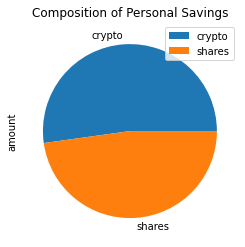

In [67]:
# Plot savings pie chart

savings_data.plot.pie(y="amount", title = "Composition of Personal Savings")


In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(savings_data.sum())

# Validate saving health

goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")
   

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2017-09-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-01', tz='America/New_York').isoformat()

In [68]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-09-01 04:00:00+00:00  110.19  110.2200  109.9100  109.97  2824636   
2017-09-05 04:00:00+00:00  110.27  110.4972  110.2100  110.42  2257109   
2017-09-06 04:00:00+00:00  110.42  110.5200  110.2301  110.30  2720188   
2017-09-07 04:00:00+00:00  110.43  110.6600  110.4200  110.57  1648825   
2017-09-08 04:00:00+00:00  110.54  110.5800  110.4300  110.44  2363231   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-01 04:00:00+00:00       10346  110.038464  247.98  248.33  247.67   
2017-09-05 04:00:00+00:00        9512  110.379039  247.27  247.52  244.95   
2017-09-06 04:00:00+00:00       10898  110.336561  246.87  247.28  246.23   
2017-09-07 04:00:00+00:00        8838  110.539314  247.27  247.27  246.40   
2017-09-08 04:00:00+00:00        9370  110.471812  246.54  247.11  246.30   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-01 04:00:00+00:00  247.84  62006989      180135  247.965488  
2017-09-05 04:00:00+00:00  246.06  91398777      330607  246.305181  
2017-09-06 04:00:00+00:00  246.90  57916867      216152  246.817023  
2017-09-07 04:00:00+00:00  246.87  58034730      184339  246.812860  
2017-09-08 04:00:00+00:00  246.58  63832825      185692  246.653947

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 500

MC_Portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [.40,.60],
    num_trading_days = 30*252
)



In [45]:
# Printing the simulation input data
MC_Portfolio.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-09-01 04:00:00+00:00  110.19  110.2200  109.9100  109.97  2824636   
2017-09-05 04:00:00+00:00  110.27  110.4972  110.2100  110.42  2257109   
2017-09-06 04:00:00+00:00  110.42  110.5200  110.2301  110.30  2720188   
2017-09-07 04:00:00+00:00  110.43  110.6600  110.4200  110.57  1648825   
2017-09-08 04:00:00+00:00  110.54  110.5800  110.4300  110.44  2363231   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-01 04:00:00+00:00       10346  110.038464          NaN  247.98   
2017-09-05 04:00:00+00:00        9512  110.379039     0.004092  247.27   
2017-09-06 04:00:00+00:00       10898  110.336561    -0.001087  246.87   
2017-09-07 04:00:00+00:00        8838  110.539314     0.002448  247.27   
2017-09-08 04:00:00+00:00        9370  110.471812    -0.001176  246.54   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-01 04:00:00+00:00  248.33  247.67  247.84  62006989      180135   
2017-09-05 04:00:00+00:00  247.52  244.95  246.06  91398777      330607   
2017-09-06 04:00:00+00:00  247.28  246.23  246.90  57916867      216152   
2017-09-07 04:00:00+00:00  247.27  246.40  246.87  58034730      184339   
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-01 04:00:00+00:00  247.965488          NaN  
2017-09-05 04:00:00+00:00  246.305181    -0.007182  
2017-09-06 04:00:00+00:00  246.817023     0.003414  
2017-09-07 04:00:00+00:00  246.812860    -0.000122  
2017-09-08 04:00:00+00:00  246.653947    -0.001175

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_Portfolio.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danny\Desktop\Bootcamp August\Challenges\API Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994760,0.993137,0.989351,0.999862,1.000106,1.009994,0.985840,0.996536,0.999115,0.997090,...,1.009379,1.004988,0.992567,1.003126,1.005387,0.985152,0.995436,0.998128,0.997956,1.004649
2,1.004476,0.997348,0.983719,0.991625,0.996862,1.014492,0.984674,0.986019,0.997471,0.994089,...,0.999014,1.017065,0.984751,0.993586,1.008564,0.995157,0.993099,1.000666,1.001753,1.011296
3,1.009142,1.004802,0.975890,0.990518,0.987683,1.023473,0.977218,0.986482,0.990623,0.971537,...,0.985073,1.026817,0.992970,0.992251,0.999949,0.993296,0.982168,0.998340,1.005153,1.008285
4,1.017527,1.011321,0.983074,0.995247,0.983157,1.030006,0.977055,0.988553,0.996217,0.973009,...,0.997695,1.024958,0.993135,0.999476,0.997707,0.997004,0.988601,0.982862,0.999867,0.998945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.463239,9.948549,33.502772,15.516977,3.419918,10.329746,2.871158,2.534781,3.751272,2.745660,...,12.919842,6.623769,1.967782,8.452567,5.129352,1.218068,2.998744,17.079725,3.000181,2.306653
7557,9.429255,9.845681,33.065032,15.692609,3.406825,10.325740,2.857904,2.502402,3.695158,2.755929,...,12.820684,6.660647,1.969645,8.445043,5.160804,1.222817,2.973851,17.169760,3.017048,2.277662
7558,9.400308,9.880905,33.422418,15.717687,3.433753,10.320284,2.851927,2.521975,3.735278,2.773944,...,12.980006,6.670560,1.993086,8.381044,5.138574,1.225608,2.997666,17.142610,3.012771,2.294978
7559,9.294335,9.852186,33.502110,15.618226,3.393689,10.298254,2.824530,2.536121,3.751550,2.773427,...,13.060794,6.702291,1.970698,8.384009,5.141701,1.230233,3.008964,17.054646,3.049166,2.342608


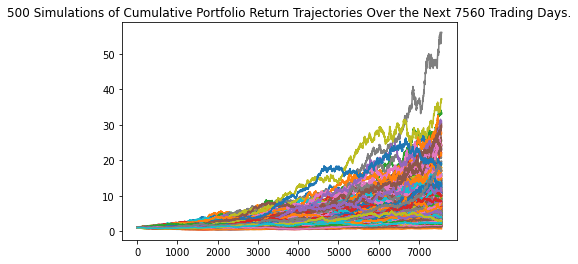

In [47]:
# Plot simulation outcomes

line_plot = MC_Portfolio.plot_simulation()


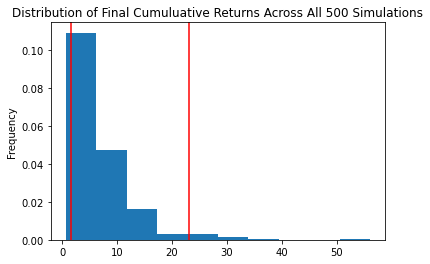

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Portfolio.plot_distribution()

### Retirement Analysis

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_Portfolio.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean              6.835046
std               5.718388
min               0.674676
25%               3.188899
50%               5.270373
75%               8.279592
max              56.097548
95% CI Lower      1.539116
95% CI Upper     23.089399
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment

initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $30782.31 and $461787.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment

initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $46173.47 and $692681.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_Portfolio_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = num_sims,
    num_trading_days = 252*5
)


In [69]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Portfolio_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danny\Desktop\Bootcamp August\Challenges\API Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006694,0.999236,1.006928,1.013036,0.985015,0.990108,1.006042,1.015461,1.006756,0.995527,...,1.004730,0.981716,1.005540,1.012302,0.990783,1.008830,0.987110,1.010225,0.998750,1.006997
2,1.001012,0.990808,1.012729,1.010500,0.966797,0.995326,0.986011,1.004073,1.004909,1.016992,...,0.999703,0.993534,1.012104,1.014313,0.986492,0.997318,0.972706,1.014599,0.996333,0.992062
3,0.989445,0.993393,1.009475,1.005826,0.966875,1.004003,0.990186,1.016519,1.014971,1.025916,...,1.004710,0.998148,0.996654,1.014542,0.981182,0.998998,0.960534,1.007538,0.991691,0.991340
4,1.003698,0.990934,1.026607,1.007562,0.954853,1.004630,0.981908,0.999874,1.005950,1.030086,...,1.001915,0.993784,1.005616,1.011068,0.994058,0.998757,0.963726,1.010095,0.992971,0.991745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.110101,2.032993,0.539743,1.351636,1.109205,2.243542,0.812256,2.771284,1.666632,0.769618,...,0.856332,1.019890,0.909602,0.921574,1.971064,1.310518,1.103439,1.205299,2.058984,2.503341
1257,1.114571,2.050276,0.544441,1.337859,1.103195,2.227859,0.796977,2.790312,1.648330,0.762239,...,0.867528,1.032786,0.897015,0.920300,1.951302,1.301831,1.115616,1.219561,2.070150,2.462733
1258,1.099499,2.039107,0.537440,1.328457,1.088203,2.307009,0.798107,2.843843,1.663617,0.747732,...,0.873323,1.047507,0.898219,0.928204,1.982080,1.313058,1.137415,1.224862,2.090407,2.485882
1259,1.112969,2.026743,0.538140,1.329883,1.096447,2.274027,0.788395,2.826917,1.625991,0.751312,...,0.874418,1.028990,0.903391,0.940597,1.974376,1.290972,1.130735,1.227516,2.096343,2.499587


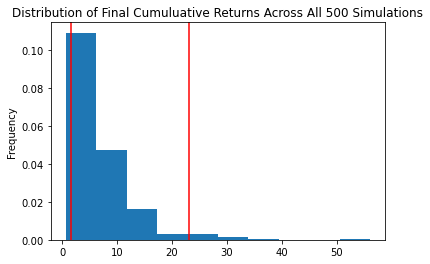

In [54]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_Portfolio.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_5 = MC_Portfolio.summarize_cumulative_return()

# Print summary statistics

print(tbl_5)


count           500.000000
mean              6.835046
std               5.718388
min               0.674676
25%               3.188899
50%               5.270373
75%               8.279592
max              56.097548
95% CI Lower      1.539116
95% CI Upper     23.089399
Name: 7560, dtype: float64


In [56]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $46173.47 and $692681.98


### Ten Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_Portfolio_10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [70]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_Portfolio_10.calc_cumulative_return()




Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\danny\Desktop\Bootcamp August\Challenges\API Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994285,0.983327,1.005294,1.004784,0.996870,1.004122,1.000234,0.997416,0.992256,0.991424,...,0.995192,0.998920,1.004158,0.995100,1.011970,0.989736,1.004506,0.994002,0.998726,1.004386
2,0.988902,0.993698,1.012312,1.010878,0.995332,1.004207,0.999284,1.009131,0.987608,0.986836,...,1.001846,0.986299,0.989635,0.999129,1.006199,0.986647,1.006896,0.993384,0.999887,1.000411
3,0.979803,0.995692,1.032457,1.018185,0.991883,0.996318,0.995957,1.020113,0.997006,0.980537,...,0.997801,0.991004,0.980027,1.003493,1.004214,1.001397,1.007168,0.989663,1.009920,1.013152
4,0.977572,0.997168,1.016421,1.015363,0.990381,0.991013,1.001864,1.020470,0.996541,0.984135,...,0.993820,0.997145,0.973977,1.005025,1.000640,0.992147,1.006447,0.987254,1.020020,1.008201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.136668,1.862643,1.190914,1.270267,1.652334,0.972564,1.335443,1.335694,1.774156,1.339005,...,1.279863,1.183130,1.026067,2.893734,1.508583,1.133941,1.047138,0.980634,1.238470,1.568940
2517,3.148717,1.861462,1.188697,1.283802,1.669208,0.976804,1.336035,1.331454,1.771692,1.340001,...,1.290212,1.182683,1.033497,2.888206,1.499743,1.145385,1.034353,0.980456,1.231593,1.578585
2518,3.126524,1.865078,1.191910,1.279131,1.684063,0.978013,1.339467,1.326455,1.772327,1.334879,...,1.297705,1.170062,1.021202,2.936515,1.478170,1.138856,1.020809,0.969843,1.239985,1.571398
2519,3.129754,1.859319,1.199827,1.284928,1.678020,0.972945,1.339794,1.335456,1.772364,1.352784,...,1.300354,1.174608,1.024253,2.932663,1.483708,1.126706,1.024466,0.972789,1.238705,1.569108


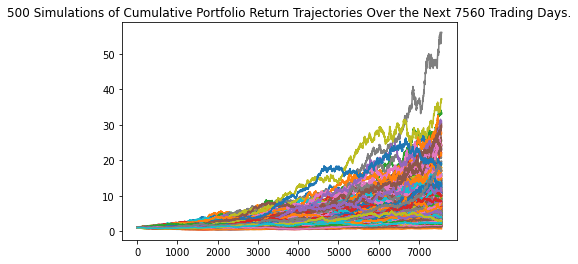

In [71]:
# Plot simulation outcomes

line_plot = MC_Portfolio.plot_simulation()


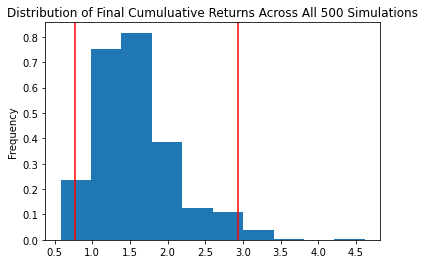

In [72]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_Portfolio_10.plot_distribution()

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_10 = MC_Portfolio.summarize_cumulative_return()

# Print summary statistics

print(tbl_10)



count           500.000000
mean              6.835046
std               5.718388
min               0.674676
25%               3.188899
50%               5.270373
75%               8.279592
max              56.097548
95% CI Lower      1.539116
95% CI Upper     23.089399
Name: 7560, dtype: float64


In [62]:
# Set initial investment

initial_investment_10 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_10 = round(tbl[8]*initial_investment,2)
ci_upper_10 = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $46173.47 and $692681.98
